In [3]:
##########################################################################################################################
  ######################################################################################################################
       ############ How to get word/bi-gram frequencies for open-ended answers of the author survey ############
  ######################################################################################################################
##########################################################################################################################

#################################
########### Import text in csv, line by line:
######################

import csv
data = []
with open ('Desktop/reviewer_decline_csvs/csv18.csv','r', encoding="utf-8") as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        data.append(str(row))


####### Change to a string format and make sure it's working:        
text = str(data)



In [194]:
#####################################################################################################
   ####### Text preprocessing (cleaning & tokenizing) with nltk:
#####################################################################################################

import nltk

####### Make the string all lower case
text = text.lower()

####### Take out numbers:
import re
text = re.sub(r'\d+', '', text)

####### Take out punctuation:
import string
text = text.translate(str.maketrans("", "", string.punctuation))

####### remove white spaces:
text = text.strip()


####### Tokenize with NLTK
from nltk.tokenize import word_tokenize
text = word_tokenize(text)
#print("\n")
#print(text[0:100])


####### Remove stop words with NLTK 'stopwords' data
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
text = [i for i in text if not i in stop_words]


####### Taking out common words you think should be removed
  ## E.G. you look at a list of common (or infrequent) words and want them out:
to_remove = ["plos", "and", "the"]
text = [i for i in text if not i in to_remove]


####### Only include words with over 1 character:
##Create new list to insert words:
new_text = []
##Create a for loop where you append each word that's over 1 char:
for word in text:
    word_length = len(word)
    if word_length > 1:
        new_text.append(word)
#print(new_text[0:25])



In [4]:
########################################################
  ######## Check your list of words called 'new_text'
########################################################

#print(new_text)



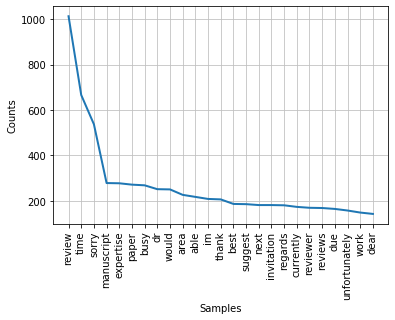

In [196]:
#####################################################################################################
   ####### Word frequencies and graphs:
#####################################################################################################

########################################
#################### Get word frequency and sort items by second element (their count), then plot
####### Sort the word frequency by frequency (2nd element):
freq = nltk.FreqDist(new_text) 
frequency = sorted(freq.items(), key=lambda x: x[1], reverse = True)
#print(frequency[0:25])

####### Get the top 25 words by frequency:
top_25_words = [x[0] for x in frequency[0:25]]
#print(top_25_words)


####### Get and print a frequency table of tokens (top 25):
freq = nltk.FreqDist(new_text) 
import matplotlib
freq.plot(25, cumulative=False)



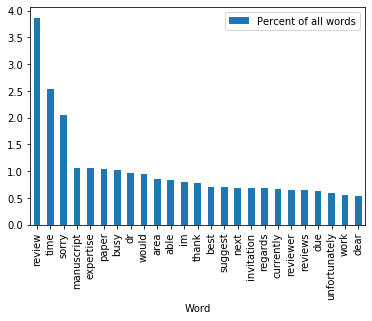

In [197]:
#####################################################################################################
   ####### Get word frequency as % of all words, sort items by second element, then plot
#####################################################################################################

####### Get the frequency of words as a percentage (and sort):
freq = nltk.FreqDist(new_text)
sum_of_freq = sum(int(x[1]) for x in freq.items())    # NOTE: same as len(clean_tokens)
freq_per = [(x[0], (float(x[1])/sum_of_freq)*100) for x in freq.items()]

### Sort and print:
freq_per = sorted(freq_per, key=lambda x: x[1], reverse = True)
#print(freq_per[0:25])


####### Show a bar chart: top 20 words as a percentage of all words in the document: 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(freq_per[0:25], columns=['Word', 'Percent of all words'])
df.plot(kind='bar', x='Word')



Text(0, 0.5, 'Percent of all bi-grams')

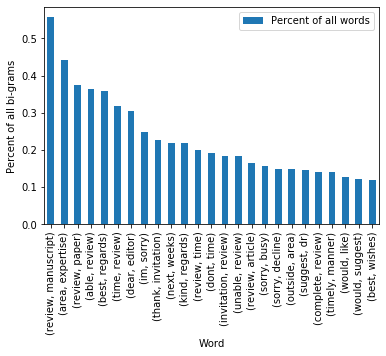

In [198]:
#####################################################################################################
   ####### Get frequency of bi-grams (as % of all bi-grams), sort items by second element, then plot
#####################################################################################################

####### Use NLTK to show bigrams (could also do, trigrams and/or ngrams)
bi_text = list(nltk.bigrams(new_text))


####### Get the frequency of words as a percentage (and sort):
freq = nltk.FreqDist(bi_text)
sum_of_freq = sum(int(x[1]) for x in freq.items())    # NOTE: same as len(clean_tokens)
freq_per = [(x[0], (float(x[1])/sum_of_freq)*100) for x in freq.items()]


### Sort and print:
freq_per = sorted(freq_per, key=lambda x: x[1], reverse = True)
#print(freq_per[0:25])

import numpy
df = pd.DataFrame(freq_per[0:25], columns=['Word', 'Percent of all words'])
df.plot(kind='bar', x='Word')
plt.ylabel('Percent of all bi-grams', fontsize=10)



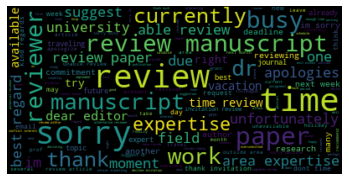

In [199]:
##### Generate word cloud. Example here: https://github.com/amueller/word_cloud/blob/master/examples/simple.py

from wordcloud import WordCloud


long_text = ' '.join(new_text)

wordcloud = WordCloud().generate(long_text)

import matplotlib.pyplot as plt
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")


wordcloud = WordCloud(max_font_size=40).generate(long_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

